In [20]:
import numpy as np;
import pandas as pd;
import matplotlib.pyplot as plt
import seaborn as sns

In [22]:
df=pd.read_csv("insurance.csv");
df

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


In [24]:
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [26]:
df.tail()

,age,sex,bmi,children,smoker,region,charges
1333,50,male,30.97,3,no,northwest,10600.5483
1334,18,female,31.92,0,no,northeast,2205.9808
1335,18,female,36.85,0,no,southeast,1629.8335
1336,21,female,25.80,0,no,southwest,2007.9450
1337,61,female,29.07,0,yes,northwest,29141.3603


In [28]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [34]:
df.shape

(1338, 7)

In [36]:
df.columns

Index(['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'charges'], dtype='object')

In [38]:
df.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [40]:
df.describe(include='O')

,sex,smoker,region
count,1338,1338,1338
unique,2,2,4
top,male,no,southeast
freq,676,1064,364


In [42]:
list(df.sex.unique())

['female', 'male']

In [44]:
df.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

there are no missing values in this dataset

In [46]:
df[df.duplicated(keep='first')]

,age,sex,bmi,children,smoker,region,charges
581,19,male,30.59,0,no,northwest,1639.5631


Dataset has only one duplicated observation. We can simply drop this row using the drop_duplicates() method.

In [48]:
df.drop_duplicates(keep='first',inplace=True)

In [50]:
df[df.duplicated(keep='first')]
#no duplicatws value

,age,sex,bmi,children,smoker,region,charges


C:\Users\ML\AppData\Local\Temp\ipykernel_4944\998864196.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df.charges,color='r')


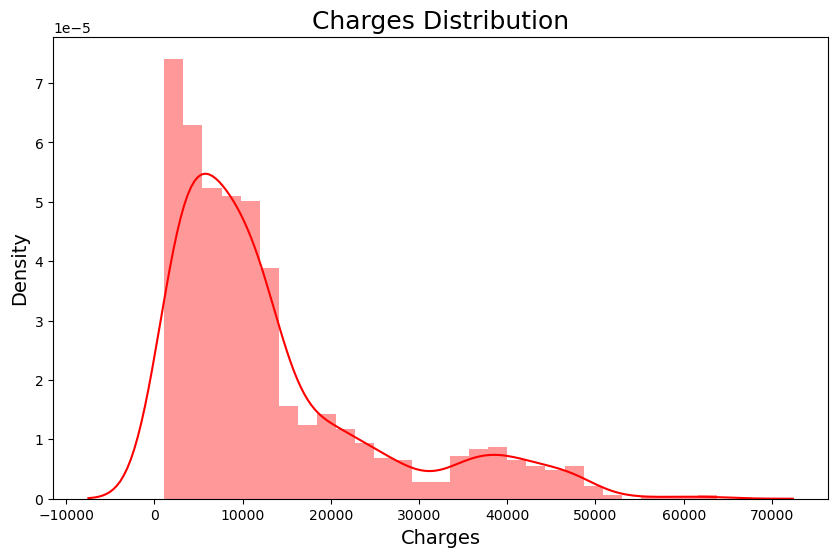

In [54]:
#Data Visulaization
# 5.1 Univariate Analysis
plt.figure(figsize=(10,6))
sns.distplot(df.charges,color='r')
plt.title('Charges Distribution',size=18)
plt.xlabel('Charges',size=14)
plt.ylabel('Density',size=14)
plt.show()

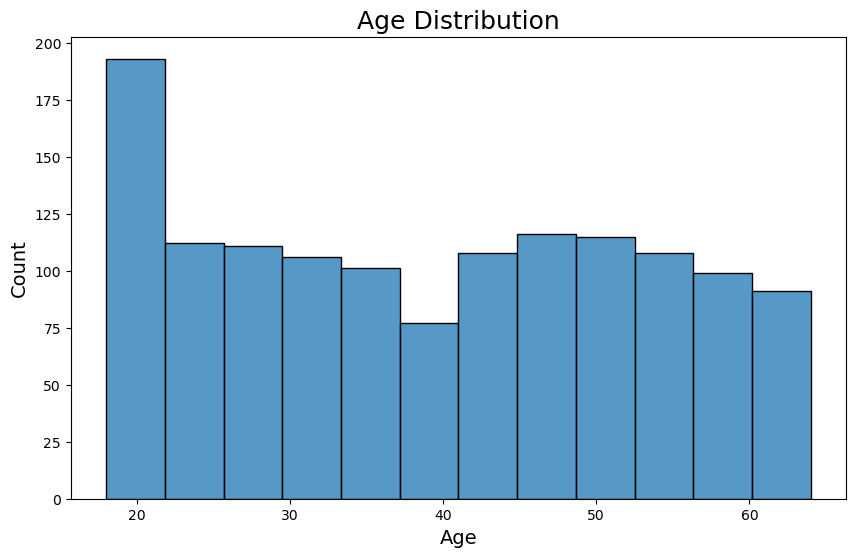

In [56]:
plt.figure(figsize=(10,6))
sns.histplot(df.age)
plt.title('Age Distribution',size=18)
plt.xlabel('Age',size=14)
plt.ylabel('Count',size=14)
plt.show()

We see that most of the customers are 18–19 years old. The distribution looks like a uniform distribution.

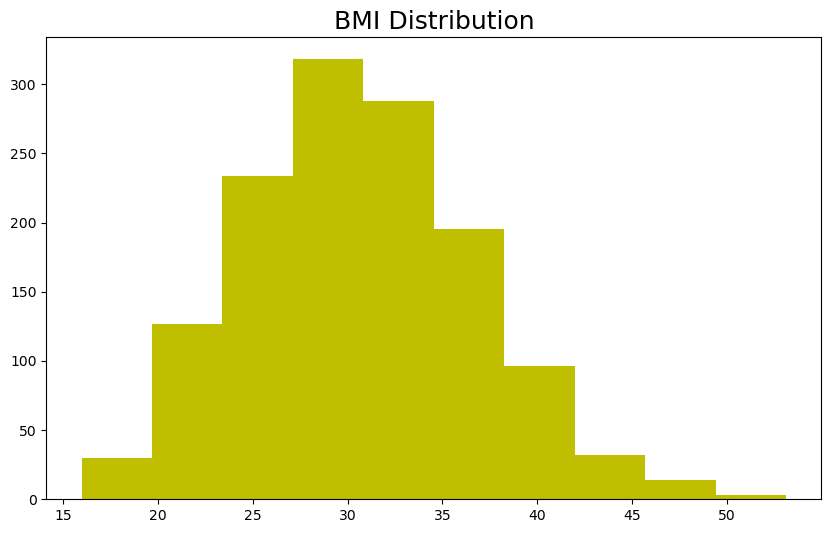

In [58]:
plt.figure(figsize=(10,6))
plt.hist(df.bmi,color='y')
plt.title('BMI Distribution',size=18)
plt.show()

BMI of people seems like a normal distribution. That’s what we expected right? Most people have BMI between 27 -34 years old.

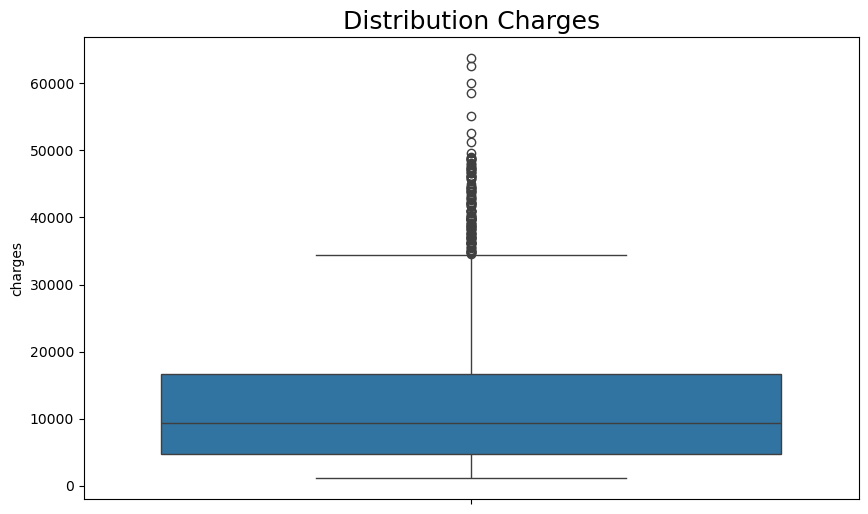

In [60]:
plt.figure(figsize = (10,6))
sns.boxplot(df.charges)
plt.title('Distribution Charges',size=18)
plt.show()

In [62]:
Q1 = df['charges'].quantile(0.25)
Q3 = df['charges'].quantile(0.75)
IQR = Q3 - Q1
print(IQR)

11911.37345


Removing outliers using IQR method

In [66]:
df[(df['charges']< Q1-1.5* IQR) | (df['charges']> Q3+1.5* IQR)]

,age,sex,bmi,children,smoker,region,charges
14,27,male,42.130,0,yes,southeast,39611.75770
19,30,male,35.300,0,yes,southwest,36837.46700
23,34,female,31.920,1,yes,northeast,37701.87680
29,31,male,36.300,2,yes,southwest,38711.00000
30,22,male,35.600,0,yes,southwest,35585.57600
...,...,...,...,...,...,...,...
1300,45,male,30.360,0,yes,southeast,62592.87309
1301,62,male,30.875,3,yes,northwest,46718.16325
1303,43,male,27.800,0,yes,southwest,37829.72420
1313,19,female,34.700,2,yes,southwest,36397.57600


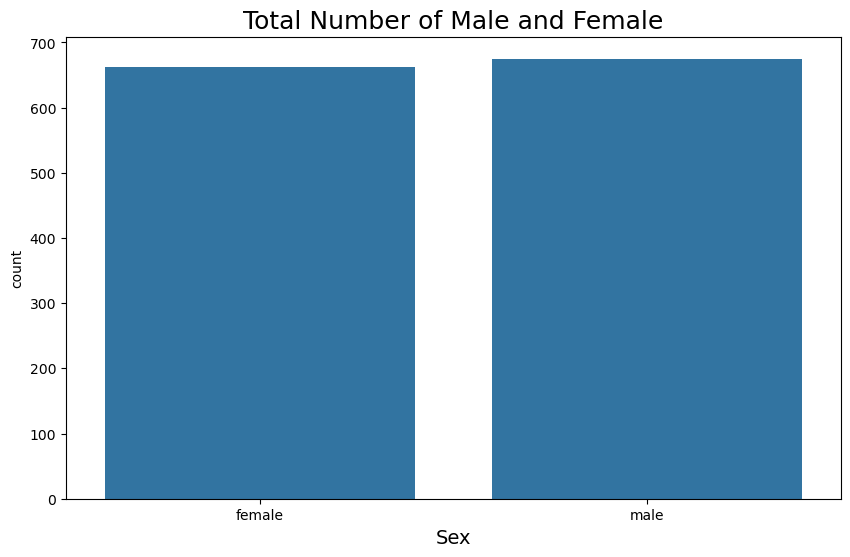

In [68]:
# Univariate Analysis for Categorical Features
plt.figure(figsize=(10,6))
sns.countplot(x = 'sex', data = df)
plt.title('Total Number of Male and Female',size=18)
plt.xlabel('Sex',size=14)
plt.show()

Female and Male customers have almost the same number within the variable.

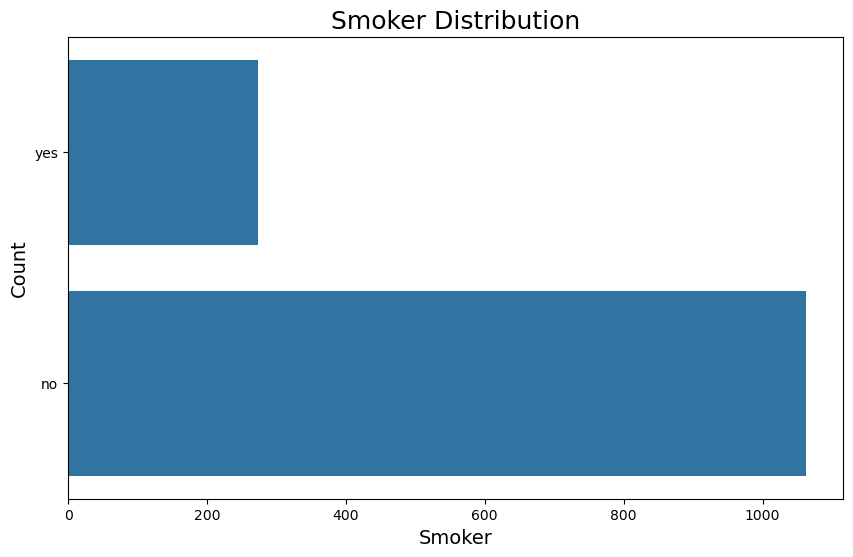

In [76]:
plt.figure(figsize = (10,6))
sns.countplot(df.smoker)
plt.title('Smoker Distribution',size=18)
plt.xlabel('Smoker',size=14)
plt.ylabel('Count',size=14)
plt.show()

In [78]:
df.smoker.value_counts()

smoker
no     1063
yes     274
Name: count, dtype: int64

The number of smokers is almost 4 times more than non-smokers.

C:\Users\ML\AppData\Local\Temp\ipykernel_4944\3039026012.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(df.region,palette='Blues')


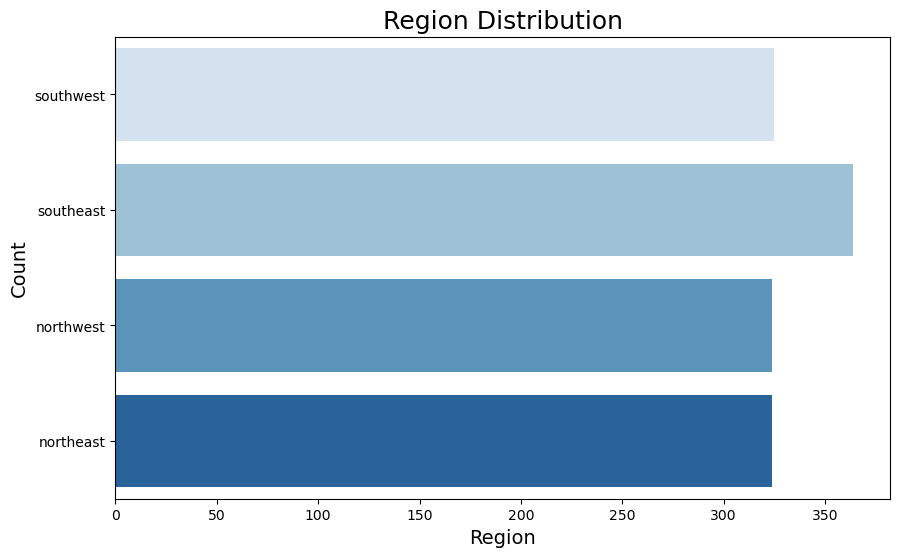

In [80]:
plt.figure(figsize = (10,6))
sns.countplot(df.region,palette='Blues')
plt.title('Region Distribution',size=18)
plt.xlabel('Region',size=14)
plt.ylabel('Count',size=14)
plt.show()

All four regions are almost equally distributed. The number of people from the southeast is slightly more than others.

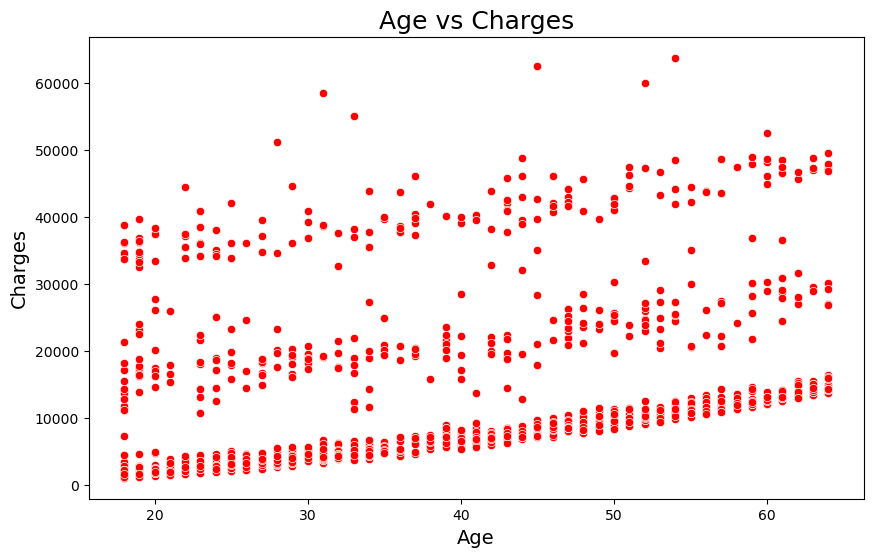

In [82]:
# 5.2 Bivariate Analysis
plt.figure(figsize = (10,6))
sns.scatterplot(x='age',y='charges',color='r',data=df)
plt.title('Age vs Charges',size=18)
plt.xlabel('Age',size=14)
plt.ylabel('Charges',size=14)
plt.show()

We see that there is a weak positive relationship between age and charges values. As age increases charges also slightly increase.

In [86]:
# Calculate correlation only for numeric columns
correlation = df[['age', 'charges']].corr()
print('Correlation between age and charges is: {:.3f}'.format(correlation.loc['age', 'charges']))


Correlation between age and charges is: 0.298


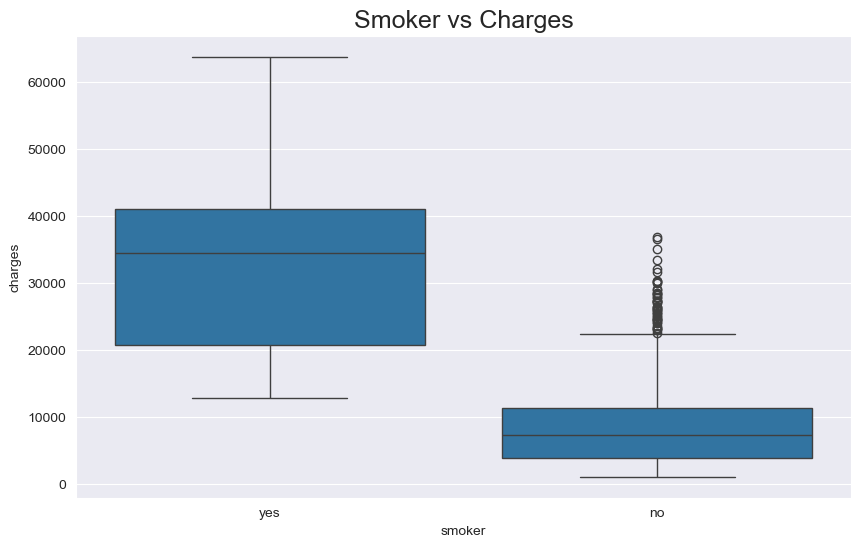

In [88]:
#smoker vs charges
plt.figure(figsize = (10,6))
sns.set_style('darkgrid')
sns.boxplot(x='smoker',y='charges',data=df)
plt.title('Smoker vs Charges',size=18);

The boxplot shows us the cost of insurance for smokers is higher than for non-smokers.

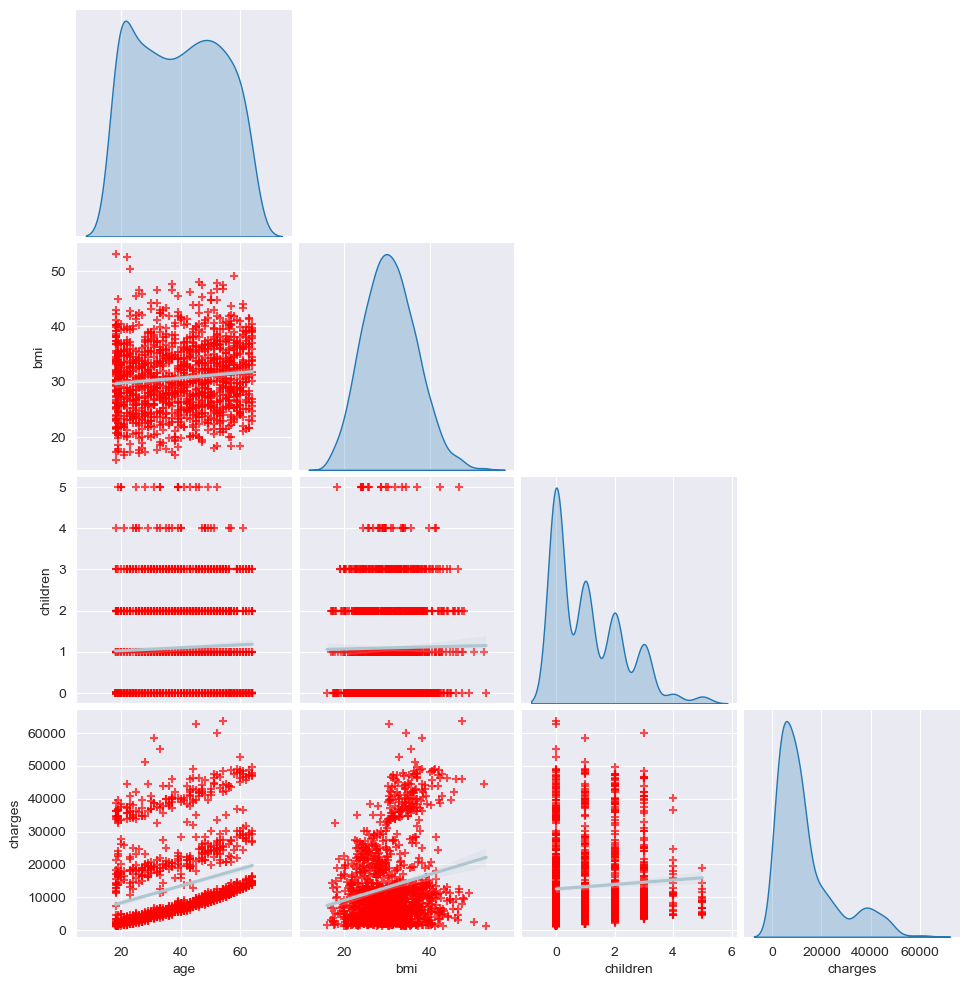

In [90]:
sns.pairplot(df, 
                 markers="+",
                 diag_kind="kde",
                 kind='reg',
                 plot_kws={'line_kws':{'color':'#aec6cf'}, 
                           'scatter_kws': {'alpha': 0.7, 
                                           'color': 'red'}},
                 corner=True);

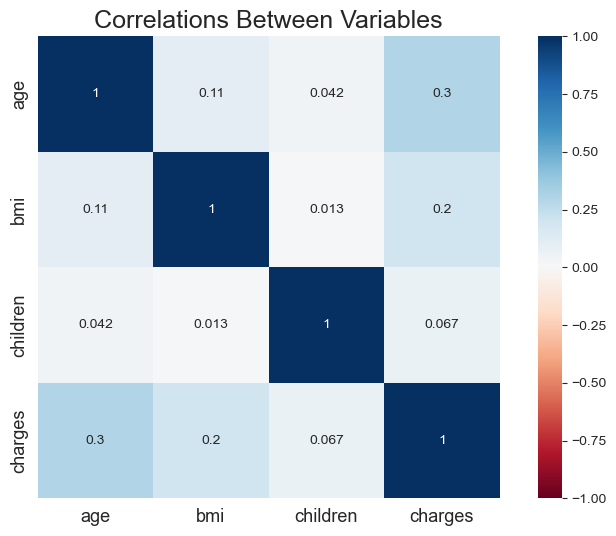

In [94]:
# 5.3 Multivariate Analysis
import seaborn as sns
import matplotlib.pyplot as plt

# Filter numeric columns
numeric_df = df.select_dtypes(include='number')

# Create the heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(numeric_df.corr(), annot=True, square=True, cmap='RdBu', vmax=1, vmin=-1)
plt.title('Correlations Between Variables', size=18)
plt.xticks(size=13)
plt.yticks(size=13)
plt.show()


In [116]:
#converting the smoker category into numeric using label encoder
from sklearn.preprocessing import LabelEncoder

# Initialize the label encoder
labelEncoder= LabelEncoder()

# Apply label encoding for 'sex' and 'smoker'
df['sex'] = labelEncoder.fit_transform(df['sex'])
df['smoker'] = labelEncoder.fit_transform(df['smoker'])


In [118]:
df = pd.get_dummies(df, columns=['region'], drop_first=True)

In [120]:
df.head()

,age,sex,bmi,children,smoker,charges,region_1,region_2,region_3
0,19,0,27.900,0,1,16884.92400,False,False,True
1,18,1,33.770,1,0,1725.55230,False,True,False
2,28,1,33.000,3,0,4449.46200,False,True,False
3,33,1,22.705,0,0,21984.47061,True,False,False
4,32,1,28.880,0,0,3866.85520,True,False,False


In [122]:
#defining features and label
X = df.drop('charges', axis=1) #droping charges from fetarues
y = df['charges'] #targetting charges as label

In [126]:
#training and testing split
from sklearn.model_selection import train_test_split

# Perform the train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Display the shapes of the resulting datasets
print(f'Training data (features) shape: {X_train.shape}')
print(f'Testing data (features) shape: {X_test.shape}')
print(f'Training data (target) shape: {y_train.shape}')
print(f'Testing data (target) shape: {y_test.shape}')

Training data (features) shape: (1069, 8)
Testing data (features) shape: (268, 8)
Training data (target) shape: (1069,)
Testing data (target) shape: (268,)


In [128]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()

# Train the model
model.fit(X_train, y_train)

LinearRegression()

In [130]:
#predicating the model
y_pred = model.predict(X_test)

In [132]:
# Create a DataFrame to show the actual vs predicted values
comparison_df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})

# Print the comparison
print(comparison_df)


           Actual     Predicted
900    8688.85885   8143.693884
1064   5708.86700   5737.115683
1256  11436.73815  14369.314876
298   38746.35510  31745.513636
237    4463.20510   8962.386657
...           ...           ...
534   13831.11520  16753.406458
542   13887.20400  15274.565769
760    3925.75820   6454.699355
1284  47403.88000  38467.156720
1285   8534.67180   8324.070599

[268 rows x 2 columns]


In [142]:
print(y_pred);

[ 8.14369388e+03  5.73711568e+03  1.43693149e+04  3.17455136e+04
  8.96238666e+03  1.31497224e+04  3.04467607e+04  1.45328881e+03
  1.06330184e+04  1.13189438e+04  1.03778536e+04  3.31184377e+04
  3.10772527e+04  1.74119253e+04  1.08016743e+04  9.52889964e+03
  4.16103784e+03  3.17315373e+04  3.21938875e+03  5.22992460e+03
  3.54979004e+03  3.02837740e+04  1.48989509e+04  3.04569093e+04
  3.11077668e+04  5.51196081e+03  3.55030401e+04  3.65704810e+04
  1.14123133e+04  1.42056990e+04  6.50234029e+03  1.27246945e+04
  3.99806590e+02  1.20883980e+04  3.96592069e+04  1.23395540e+04
  4.74412279e+03  3.91903157e+03  3.08606789e+04  8.95870663e+03
  7.05389441e+03  3.01125636e+04  3.47804324e+04  1.22916189e+04
  7.35739310e+03  3.42060530e+03  6.21243471e+03  8.98345200e+03
  4.26401828e+03  9.01992870e+03  6.60149578e+03  1.20802337e+04
  3.12447687e+04  3.55341947e+03  1.10470477e+04  9.73512492e+03
  1.08383403e+04  2.42942719e+03  3.11621909e+04  9.40578078e+03
  1.55793421e+04  8.19158

In [134]:
import numpy as np
from sklearn.metrics import mean_squared_error

# Calculate MSE
mse = mean_squared_error(y_test, y_pred)

# Calculate RMSE
rmse = np.sqrt(mse)

# Print the results
print(f"Mean Squared Error (MSE): {mse}")
print(f"Root Mean Squared Error (RMSE): {rmse}")


Mean Squared Error (MSE): 35478020.67523561
Root Mean Squared Error (RMSE): 5956.342894363588


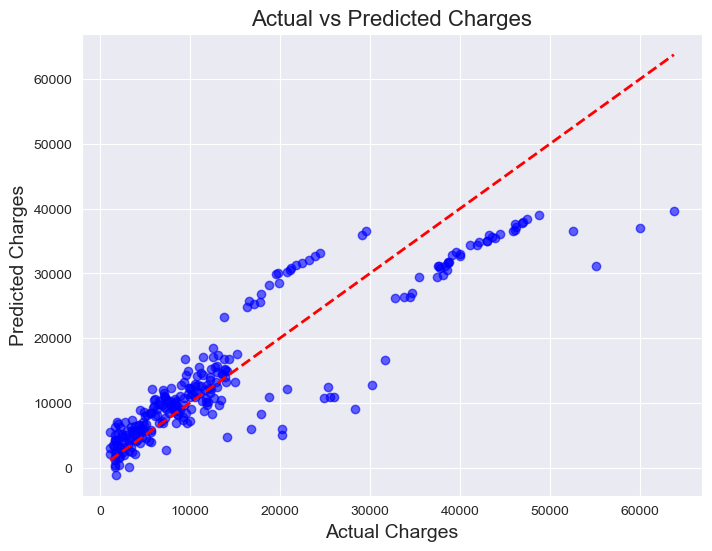

In [136]:
import matplotlib.pyplot as plt

# Plotting the actual vs predicted values
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, color='blue', alpha=0.6)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--', lw=2)
plt.title('Actual vs Predicted Charges', fontsize=16)
plt.xlabel('Actual Charges', fontsize=14)
plt.ylabel('Predicted Charges', fontsize=14)
plt.show()


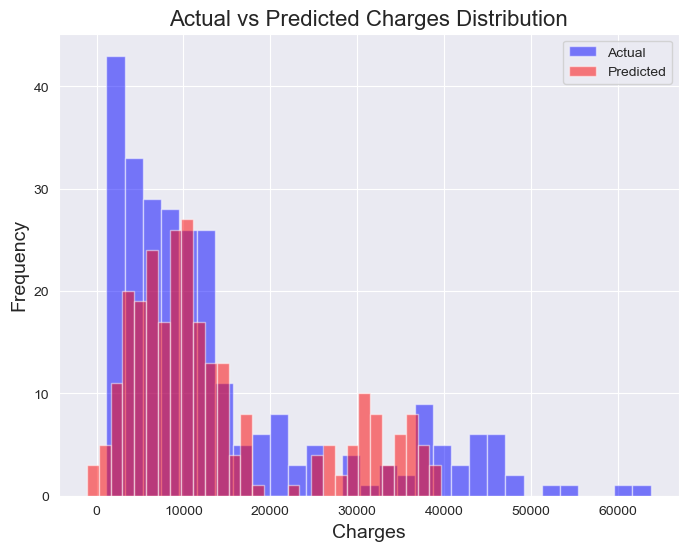

In [138]:
plt.figure(figsize=(8, 6))
plt.hist(y_test, bins=30, color='blue', alpha=0.5, label='Actual')
plt.hist(y_pred, bins=30, color='red', alpha=0.5, label='Predicted')
plt.title('Actual vs Predicted Charges Distribution', fontsize=16)
plt.xlabel('Charges', fontsize=14)
plt.ylabel('Frequency', fontsize=14)
plt.legend()
plt.show()


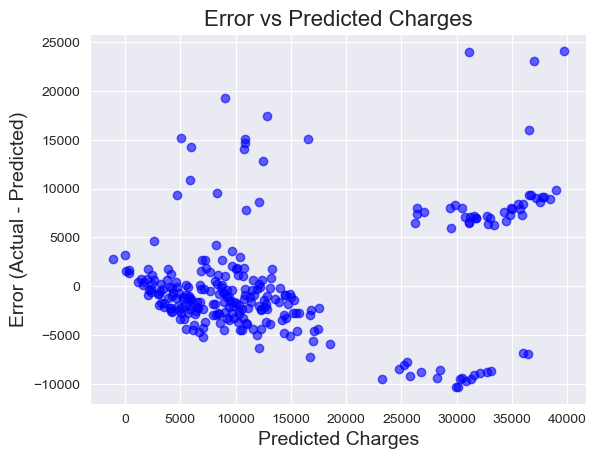

In [140]:
plt.scatter(y_pred, y_test - y_pred, color='blue', alpha=0.6)
plt.title('Error vs Predicted Charges', fontsize=16)
plt.xlabel('Predicted Charges', fontsize=14)
plt.ylabel('Error (Actual - Predicted)', fontsize=14)
plt.show()
